In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from keras.models import Model

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3380309016323086941
 xla_global_id: -1]

In [3]:
random_state = 1

# data load

In [4]:
data_1 = pd.read_csv('./data/raw_data.csv')
data_c1 = pd.read_csv('./data/raw_data_c1.csv')
data_c2 = pd.read_csv('./data/raw_data_c2.csv')

data_1 = data_1.dropna(axis=1, how='all') #결측치 열 삭제
data_c1 = data_c1.dropna(axis=1, how='all') #결측치 열 삭제
data_c2 = data_c2.dropna(axis=1, how='all') #결측치 열 삭제

In [42]:
data_1.describe()

,Unnamed: 0,PC1_SP,PC2_SP,FC_SP,TC_SP,TC2_SP,RR1_SP,RR2_SP,TCF,PC1,...,Column1 D,Column2 D,Column1 reflux,Column2 reflux,Column1 B,Column2 B,Column1 Qcond,Column2 Qcond,Column1 Qreb,Column2 Qreb
count,70000.000000,70000.000000,70000.000000,70000.00000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.00000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,7.000000e+04,70000.000000,70000.000000
mean,34999.500000,0.550000,12.000000,2000.00000,73.500000,166.000000,0.157500,0.600000,30.000000,0.549993,...,206.76342,87.806878,32.558245,52.624182,1879.483697,117.797329,-7.815538,-3.986894e+00,9.263028,5.391271
std,20207.403759,0.057735,0.577347,230.93887,2.598062,3.464083,0.004330,0.028867,11.546944,0.057703,...,22.58409,15.337277,3.608640,9.191652,212.399012,15.439823,0.974433,7.435129e-01,1.406946,1.022422
min,0.000000,0.450500,11.005000,1602.00000,69.022500,160.030000,0.150037,0.550250,10.100000,0.447512,...,148.97200,43.745500,23.669900,25.930100,1465.270000,32.709500,-14.834800,-7.002020e+00,6.560440,3.504950
25%,17499.750000,0.500250,11.502500,1801.00000,71.261250,163.015000,0.153769,0.575125,20.050000,0.500496,...,188.28550,77.193100,29.790675,45.766425,1697.430000,107.505500,-8.524280,-4.312295e+00,8.119483,4.699043
50%,34999.500000,0.550000,12.000000,2000.00000,73.500000,166.000000,0.157500,0.600000,30.000000,0.549615,...,208.50000,85.807650,32.735350,51.443050,1882.000000,118.035000,-7.819280,-3.896915e+00,9.170320,5.266090
75%,52499.250000,0.599750,12.497500,2199.00000,75.738750,168.985000,0.161231,0.624875,39.950000,0.600494,...,227.04450,94.915825,35.543425,57.385425,2061.872500,129.439000,-7.045565,-3.484725e+00,10.334100,5.823945
max,69999.000000,0.649500,12.995000,2398.00000,77.977500,171.970000,0.164963,0.649750,49.900000,0.650905,...,248.37700,140.311000,40.567600,86.640100,2257.740000,196.376000,-4.307670,3.510000e-09,13.604700,10.424800


In [14]:
data_1.keys()

Index(['Unnamed: 0', 'PC1_SP', 'PC2_SP', 'FC_SP', 'TC_SP', 'TC2_SP', 'RR1_SP',
       'RR2_SP', 'TCF', 'PC1', 'PC2', 'TC1', 'TC2', 'Column1 D', 'Column2 D',
       'Column1 reflux', 'Column2 reflux', 'Column1 B', 'Column2 B',
       'Column1 Qcond', 'Column2 Qcond', 'Column1 Qreb', 'Column2 Qreb'],
      dtype='object')

In [16]:
data_c1.keys()

Index(['Unnamed: 0', 'PC1_SP', 'FC_SP', 'TC_SP', 'RR1_SP', 'TCF', 'PC1', 'PC2',
       'TC1', 'TC2', 'Column1 D', 'Column2 D', 'Column1 reflux',
       'Column2 reflux', 'Column1 B', 'Column2 B', 'Column1 Qcond',
       'Column2 Qcond', 'Column1 Qreb', 'Column2 Qreb'],
      dtype='object')

In [25]:
'PC1_SP' in data_c1.keys()

True

In [39]:
# not in data_c1
[x for x in data_1.keys() if x not in data_c1.keys()]

['PC2_SP', 'TC2_SP', 'RR2_SP']

In [40]:
# not in data_c2
[x for x in data_1.keys() if x not in data_c2.keys()]

['PC1_SP', 'TC_SP', 'RR1_SP']

In [43]:
set_pc1 = 0.5328
set_tc1 = 85.1277
set_rr1 = 0.439288

set_pc2 = 12.7037
set_tc2 = 168.7127
set_rr2 = 0.600864

## train/test split

In [6]:
test_ratio = 0.1

data_size = len(data_1)
test_size = int(data_size*test_ratio)
data_train = data_1[:-test_size]
data_test = data_1[-test_size:]

print("data_train:", data_train.shape)
print("data_test:", data_test.shape)

data_train: (63000, 23)
data_test: (7000, 23)


## variables

In [7]:
set_points = ['PC1_SP', 'PC2_SP', 'FC_SP', 'TC_SP', 'TC2_SP', 
              'RR1_SP', 'RR2_SP', 'TCF']
process_vars = ['PC1', 'PC2', 'TC1', 'TC2', 'Column1 D', 'Column2 D',
                'Column1 reflux', 'Column2 reflux', 'Column1 B', 'Column2 B',
                'Column1 Qcond', 'Column2 Qcond', 'Column1 Qreb', 'Column2 Qreb']

## data scaling

In [8]:
# select data considered
all_vars = set_points + process_vars

df_train = data_train[all_vars]
df_test = data_test[all_vars]

# Obtain mean and std
mean = df_train.mean(axis=0)
std = df_train.std(axis=0)

# scaled dataset
df_train_sc = (df_train-mean)/std
df_test_sc = (df_test-mean)/std

## data to sequence

**encoder_input**: history of `set points` and `process variables`

**decoder_input**: future `set points`

**decoder_output**: prediction of future `process variables`

In [9]:
def data2sequence(dataframe, 
                  set_points, process_vars,
                  history_size, prediction_size, 
                  step=1, start_idx=0, end_idx=None,
                  stride=1):
    
    history_inputs = set_points + process_vars
    target_outputs = process_vars
        
    history_data = dataframe[history_inputs].values
    target_data = dataframe[target_outputs].values
    sp_data = dataframe[set_points].values
    
    history_sequence = []
    target_sequence = []
    sp_sequence = []
    
    start_idx = start_idx + history_size # target step t+1
    
    if end_idx is None:
        end_idx = len(dataframe) - prediction_size
    else:
        end_idx = end_idx - prediction_size
    assert start_idx >= 0, 'start_idx is under 0'
    assert end_idx >=0, 'end_idx is under 0'
    
    i = start_idx
    while i <= end_idx:
        history_sequence.append(history_data[range(i-history_size, i, step)])
        if prediction_size == 1:
            target_sequence.append(target_data[i])
            sp_sequence.append(sp_data[i])
        else:
            target_sequence.append(target_data[i : i+prediction_size : step])
            sp_sequence.append(sp_data[i : i+prediction_size : step])
        i+=stride
    
    encoder_input = np.array(history_sequence)
    decoder_input = np.array(sp_sequence)
    decoder_output = np.array(target_sequence)
    
    return encoder_input, decoder_input, decoder_output

# single-step ahead prediction

In [10]:
history_size = 100
prediction_size = 1
stride = 1

encoder_input, decoder_input, decoder_output = data2sequence(df_train_sc, 
                                                             set_points, process_vars,
                                                             history_size, prediction_size,
                                                             stride=stride)
print("Train dataset")
print("encoder_input:", encoder_input.shape)
print("decoder_input:", decoder_input.shape)
print("decoder_output:", decoder_output.shape)
print("")

Train dataset
encoder_input: (62900, 100, 22)
decoder_input: (62900, 8)
decoder_output: (62900, 14)



## RNN model

> **squence-to-vector learning** <br>
> input sequence: (sample_size, history_size, # of input_vars) <br>
> output sequence: (sample_size, # of output_vars)

In [11]:
def Seq2VecLSTM(
    history_size, history_dim, 
    prediction_size, prediction_dim,
    rnn_neurons = [100], dense_neurons = [100]
):
    encoder_input = Input(shape=(history_size, history_dim), name='input_encoder')
    
    # encoder module
    if len(rnn_neurons) == 1:
        encoder_output, state_h, state_c = LSTM(rnn_neurons[0], return_state=True, name='encoder')(encoder_input)
        encoder_states = [state_h, state_c]
        
    else:
        num_layers = len(rnn_neurons)
        for i, neurons in enumerate(rnn_neurons):
            #first encoder layer
            if i==0: 
                encoder_output = LSTM(neurons, return_sequences=True, name="encoder_1")(encoder_input)
            #mediate encoder layer
            elif i < num_layers-1: 
                encoder_output = LSTM(neurons, return_sequences=True, name=f"encoder_{i+1}")(encoder_output)
            #last encoder layer
            else: 
                encoder_output, _, _  = LSTM(neurons, return_state=True, name=f"encoder_last")(encoder_output)
    
    # dense module
    if len(dense_neurons) == 1:
        dense_output = Dense(dense_neurons[0], name='dense')(encoder_output)
        dense_output = Dense(prediction_dim, name='dense_last')(dense_output)
    else:
        num_layers = len(dense_neurons)
        for i, neurons in enumerate(dense_neurons):
            #first dense layer
            if i==0:
                dense_output = Dense(neurons, name='dense_1')(encoder_output)
            #mediate encoder layer
            else:
                dense_output = Dense(neurons, name=f'dense_{i+1}')(dense_output)
        dense_output = Dense(prediction_dim, name=f'dense_last')(dense_output)  
    
    # model compile
    model = Model(encoder_input, dense_output)
    optimizer = keras.optimizers.Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss='mse', optimizer = optimizer)
    
    return model

bulid model

In [12]:
history_dim = len(set_points+process_vars)
prediction_dim = len(process_vars)
rnn_neurons = [100, 10]
dense_neurons = [100, 10]

rnn_model = Seq2VecLSTM(history_size, history_dim,
                        prediction_size, prediction_dim,
                        rnn_neurons = rnn_neurons, dense_neurons = dense_neurons
)

rnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_encoder (InputLayer)  [(None, 100, 22)]         0         
                                                                 
 encoder_1 (LSTM)            (None, 100, 100)          49200     
                                                                 
 encoder_last (LSTM)         [(None, 10),              4440      
                              (None, 10),                        
                              (None, 10)]                        
                                                                 
 dense_1 (Dense)             (None, 100)               1100      
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_last (Dense)          (None, 14)                154   

model training

In [13]:
import os

def exists(path):
    istrue = os.path.exists(path)
    return istrue

def createfolder(path):
    if not exists(path):
        os.makedirs(path)

In [14]:
from keras.callbacks import EarlyStopping

patience = 20
monitor='val_loss'
early_stopping_cb = EarlyStopping(patience=patience, restore_best_weights= True, monitor=monitor)

epochs = 10000
verbose = 2
batch_size = 128
valid_ratio = 0.2

# data_setting = f'R{random_state},N{data_size},S_t{test_ratio}_v{valid_ratio}'
# sequence_setting = f'W_h{history_size}_p{prediction_size}_s{stride}'
# model_setting = 
model_name = 'rnn_model test_version_1'
save_path = f'./model/{model_name}'
if not exists(save_path):
    tf.random.set_seed(random_state)
    history = rnn_model.fit(encoder_input, decoder_output,
                            epochs=epochs, batch_size = batch_size,
                            callbacks=[early_stopping_cb], verbose=verbose,validation_split=valid_ratio)
    tf.keras.models.save_model(rnn_model, save_path)
    print(f"model is saved to: {save_path}")
    
else:
    rnn_model = tf.keras.models.load_model(save_path)
    print(f"model is loaded from: {save_path}")

model is loaded from: ./model/rnn_model test_version_1


model test

In [15]:
unit_size = 350
test_num = int(len(data_test)/unit_size)-1 # exclude last unit_size
test_num = 1

single_test_list = []
for k in range(test_num):
    print(k+1,"th test")
    # set_point and actual value
    start_point = unit_size*(k+1)
    
    setpoint = df_test[set_points].iloc[start_point : start_point+unit_size].values
    actual = df_test[process_vars].iloc[start_point : start_point+unit_size].values
    
    prediction_list = []
    test_input = df_test_sc[all_vars].iloc[start_point-history_size:start_point].values[np.newaxis]
    for i in range(unit_size):
        prediction_idx = start_point + i # target values at t+1

        # prediction
        prediction_sc = rnn_model.predict(test_input, verbose=0)
        prediction_list.append(prediction_sc[0])

        # update input
        new_setpoint = df_test_sc[set_points].iloc[[prediction_idx]].values # set point at t+1
        new_input = np.concatenate([new_setpoint, prediction_sc], axis=1)[np.newaxis]
        test_input = np.delete(test_input, 0, axis=1)
        test_input = np.concatenate([test_input, new_input], axis=1)
    
    # prediction
    prediction_sc = np.array(prediction_list)
    prediction = prediction_sc*std[process_vars].values + mean[process_vars].values
    
    single_test_list.append([setpoint, actual, prediction])

1 th test
2 th test


plot test result

In [ ]:
unit_size = 350

start_point = unit_size*1
test_input = df_test_sc[all_vars].iloc[start_point-history_size:start_point].values[np.newaxis]

# build encoder-decoder structure
encoder = Model(seq2seq_model.get_layer(name='encoder').input, seq2seq_model.get_layer(name='encoder').output)
encoder_out = encoder.predict(test_input)
encoder_states = encoder_out[1:]

decoder = Model(seq2seq_model.get_layer(name='decoder').input, seq2seq_model.get_layer(name='dense_last').output)
# input = [n sample, target len, dim vars], h=[n sample, dim context], c=[n sample, dim context]

# generate target sequence
decoder_out = []
decoder_in = test_input[:,[-1],:]
for i in range(unit_size):
    temp_out = decoder([decoder_in, encoder_states[0], encoder_states[1]])
    decoder_out.append(temp_out.numpy()[0,0,:])
    new_set = df_test_sc[set_points].iloc[[start_point+i]].values[np.newaxis]
    new_in = temp_out.numpy()
    decoder_in = np.concatenate([new_set, new_in], axis=2)

# prepare comparison
decoder_out_sc = np.array(decoder_out)
test_out_sc = df_test_sc[process_vars].iloc[start_point:start_point+unit_size].values

test_out = test_out_sc*std[process_vars].values + mean[process_vars].values
decoder_out = decoder_out_sc*std[process_vars].values + mean[process_vars].values

# plot graph
plt.figure(figsize=(15,2*len(process_vars)))
for i in range(len(process_vars)):
    plt.subplot(len(process_vars), 1, i+1)
    plt.plot(test_out[:,i], label='Actual')
    plt.plot(decoder_out[:,i], label='Prediction')
    plt.legend()
    plt.title(process_vars[i])
plt.tight_layout()
plt.show()

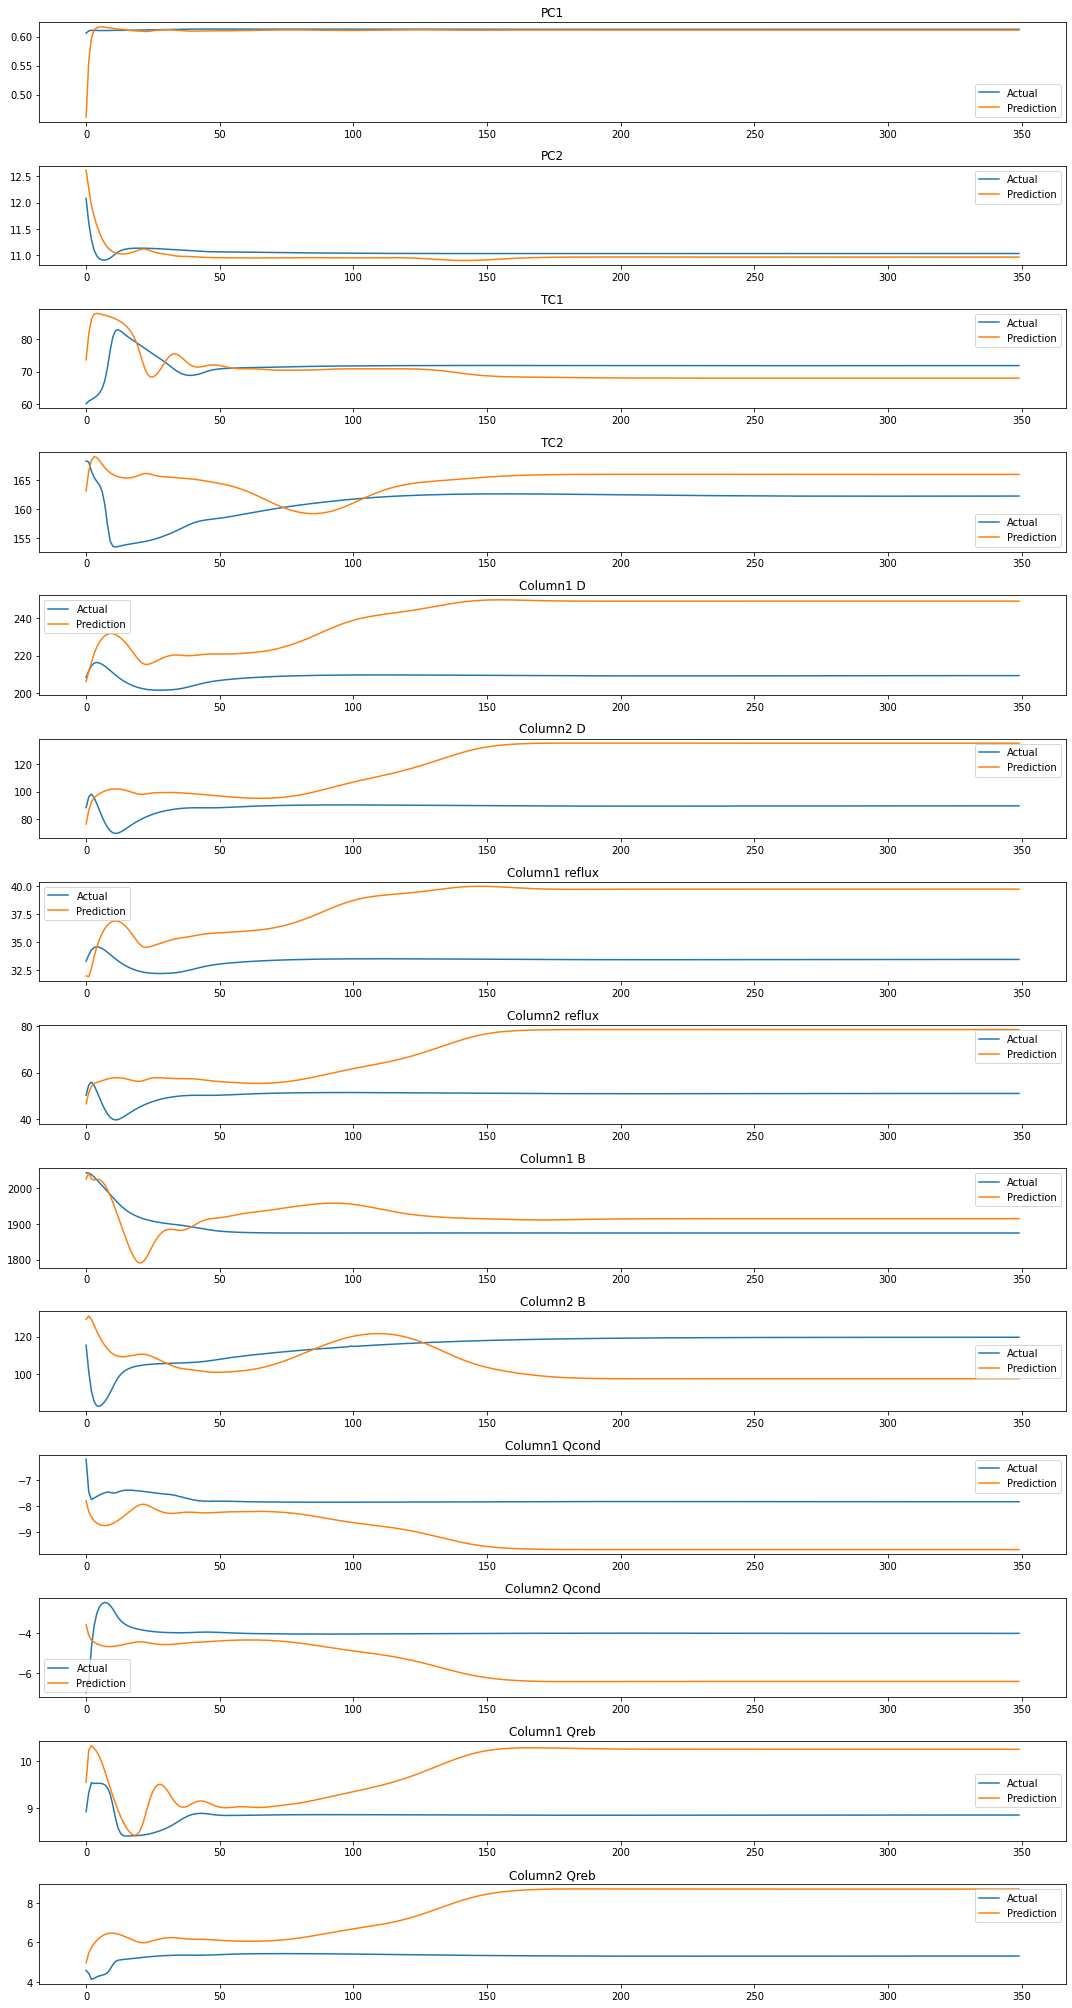

In [54]:
plot_var = ['PC1', 'PC2', 'TC2']
set_num = [0, 1, 4]
plot_list = single_test_list

test_num = 0
setpoint = plot_list[test_num][0]
actual = plot_list[test_num][1]
prediction = plot_list[test_num][2]

# plot graph
plt.figure(figsize=(15,2*len(process_vars)))
for i in range(len(process_vars)):
    plt.subplot(len(process_vars), 1, i+1)
    plt.plot(actual[:,i], label='Actual')
    plt.plot(prediction[:,i], label='Prediction')
    plt.legend()
    plt.title(process_vars[i])
plt.tight_layout()
plt.show()

# Multi-step ahead prediction

In [17]:
def data2sequence(dataframe, 
                  set_points, process_vars,
                  history_size, prediction_size, 
                  step=1, start_idx=0, end_idx=None,
                  stride=1):
    
    history_inputs = set_points + process_vars
    target_outputs = process_vars
        
    history_data = dataframe[history_inputs].values
    target_data = dataframe[target_outputs].values
    
    encoder_input = []
    decoder_input = []
    decoder_output = []
    
    start_idx = start_idx + history_size # target step t+1
    
    if end_idx is None:
        end_idx = len(dataframe) - prediction_size
    else:
        end_idx = end_idx - prediction_size
    assert start_idx >= 0, 'start_idx is under 0'
    assert end_idx >=0, 'end_idx is under 0'
    
    i = start_idx
    while i <= end_idx:
        encoder_input.append(history_data[i-history_size : i : step])
        if prediction_size == 1:
            decoder_output.append(target_data[i])
        else:
            decoder_input.append(history_data[i-step : i-step+prediction_size : step])
            decoder_output.append(target_data[i : i+prediction_size : step])
            
        i+=stride
    
    encoder_input = np.array(encoder_input)
    decoder_input = np.array(decoder_input)
    decoder_output = np.array(decoder_output)
    
    return encoder_input, decoder_input, decoder_output

In [18]:
history_size = 40
prediction_size = 5
stride = 1

encoder_input, decoder_input, decoder_output = data2sequence(df_train_sc, 
                                                             set_points, process_vars,
                                                             history_size, prediction_size,
                                                             stride=stride)
print("Train dataset")
print("encoder_input:", encoder_input.shape)
print("decoder_input:", decoder_input.shape)
print("decoder_output:", decoder_output.shape)
print("")

Train dataset
encoder_input: (62956, 40, 22)
decoder_input: (62956, 5, 22)
decoder_output: (62956, 5, 14)



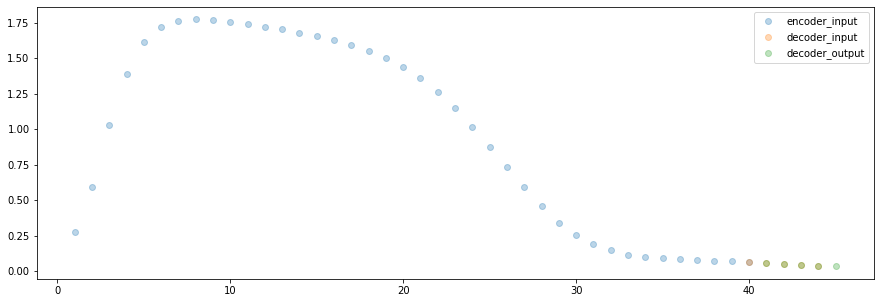

In [19]:
plt.figure(figsize=(15,5))
plt.scatter(range(1, 1+history_size), encoder_input[0, :, 11], label='encoder_input', alpha=0.3)
plt.scatter(range(history_size, history_size+prediction_size), decoder_input[0, :, 11], label='decoder_input', alpha=0.3)
plt.scatter(range(history_size+1, history_size+prediction_size+1), decoder_output[0, :, 3], label='decoder_output', alpha=0.3)
plt.legend()
plt.show()

## Seq2Seq model

> **squence-to-vector learning** <br>
> input sequence: (sample_size, history_size, # of input_vars) <br>
> output sequence: (sample_size, # of output_vars)

In [20]:
def Seq2SeqLSTM(
    history_size, history_dim, 
    prediction_size, prediction_dim,
    encoder_neurons = [100], decoder_neurons = [100], dense_neurons = [100]
):
    encoder_input = Input(shape=(None, history_dim), name='input_encoder')
    
    # encoder module
    if len(encoder_neurons) == 1:
        encoder_output, state_h, state_c = LSTM(encoder_neurons[0], return_state=True, name='encoder')(encoder_input)
        encoder_states = [state_h, state_c]
        
    else:
        num_layers = len(encoder_neurons)
        for i, neurons in enumerate(encoder_neurons):
            #first encoder layer
            if i==0: 
                encoder_output = LSTM(neurons, return_sequences=True, name="encoder_1")(encoder_input)
            #mediate encoder layer
            elif i < num_layers-1: 
                encoder_output = LSTM(neurons, return_sequences=True, name=f"encoder_{i+1}")(encoder_output)
            #last encoder layer
            else: 
                encoder_output, state_h, state_c  = LSTM(neurons, return_state=True, name=f"encoder_last")(encoder_output)
                encoder_states = [state_h, state_c]
                
    # decoder input
    decoder_input = Input(shape=(None, history_dim), name='input_decoder')
    
    # decoder module
    if len(decoder_neurons) == 1:
        decoder_output = LSTM(decoder_neurons[0], return_sequences=True, name='decoder')(decoder_input, initial_state=encoder_states)
        
    else:
        num_layers = len(decoder_neurons)
        for i, neurons in enumerate(decoder_neurons):
            #first encoder layer
            if i==0: 
                decoder_output = LSTM(neurons, return_sequences=True, name='decoder_1')(decoder_input, initial_state=encoder_states)
            #mediate encoder layer
            elif i < num_layers-1: 
                decoder_output = LSTM(neurons, return_sequences=True, name=f"decoder_{i+1}")(decoder_output)
            #last encoder layer
            else: 
                decoder_output = LSTM(neurons, return_sequences=True, name=f"decoder_last")(decoder_output)
    
    # dense module
    if len(dense_neurons) == 1:
        dense_output = Dense(dense_neurons[0], name='dense')(decoder_output)
        dense_output = Dense(prediction_dim, name='dense_last')(dense_output)
    else:
        num_layers = len(dense_neurons)
        for i, neurons in enumerate(dense_neurons):
            #first dense layer
            if i==0:
                dense_output = Dense(neurons, name='dense_1')(decoder_output)
            #mediate encoder layer
            else:
                dense_output = Dense(neurons, name=f'dense_{i+1}')(dense_output)
        dense_output = Dense(prediction_dim, name=f'dense_last')(dense_output)  
    
    # model compile
    model = Model([encoder_input, decoder_input], dense_output)
    optimizer = keras.optimizers.Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss='mse', optimizer = optimizer)
    
    return model

bulid model

In [21]:
history_dim = len(set_points+process_vars)
prediction_dim = len(process_vars)
encoder_neurons = [100]
decoder_neurons = [100]
dense_neurons = [128, 64, 32]

seq2seq_model = Seq2SeqLSTM(history_size, history_dim,
                        prediction_size, prediction_dim,
                        encoder_neurons = encoder_neurons, 
                        decoder_neurons = decoder_neurons,
                        dense_neurons = dense_neurons
)

seq2seq_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_encoder (InputLayer)     [(None, None, 22)]   0           []                               
                                                                                                  
 input_decoder (InputLayer)     [(None, None, 22)]   0           []                               
                                                                                                  
 encoder (LSTM)                 [(None, 100),        49200       ['input_encoder[0][0]']          
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                            

model training

In [22]:
import os

def exists(path):
    istrue = os.path.exists(path)
    return istrue

def createfolder(path):
    if not exists(path):
        os.makedirs(path)

In [23]:
from keras.callbacks import EarlyStopping

patience = 20
monitor='val_loss'
early_stopping_cb = EarlyStopping(patience=patience, restore_best_weights= True, monitor=monitor)

epochs = 10000
verbose = 2
batch_size = 128
valid_ratio = 0.2

# data_setting = f'R{random_state},N{data_size},S_t{test_ratio}_v{valid_ratio}'
# sequence_setting = f'W_h{history_size}_p{prediction_size}_s{stride}'
# model_setting = 
model_name = f'seq2seq_model {history_size} history {prediction_size} prediction version 1'
save_path = f'./model/{model_name}'
if not exists(save_path):
    tf.random.set_seed(random_state)
    history = seq2seq_model.fit([encoder_input, decoder_input], decoder_output,
                                epochs=epochs, batch_size = batch_size,
                                callbacks=[early_stopping_cb], verbose=verbose,
                                validation_split=valid_ratio)
    tf.keras.models.save_model(seq2seq_model, save_path)
    print(f"model is saved to: {save_path}")
    
else:
    seq2seq_model = tf.keras.models.load_model(save_path)
    print(f"model is loaded from: {save_path}")

model is loaded from: ./model/seq2seq_model 40 history 5 prediction version 1


model test

1/1 [==============================] - 0s 277ms/step


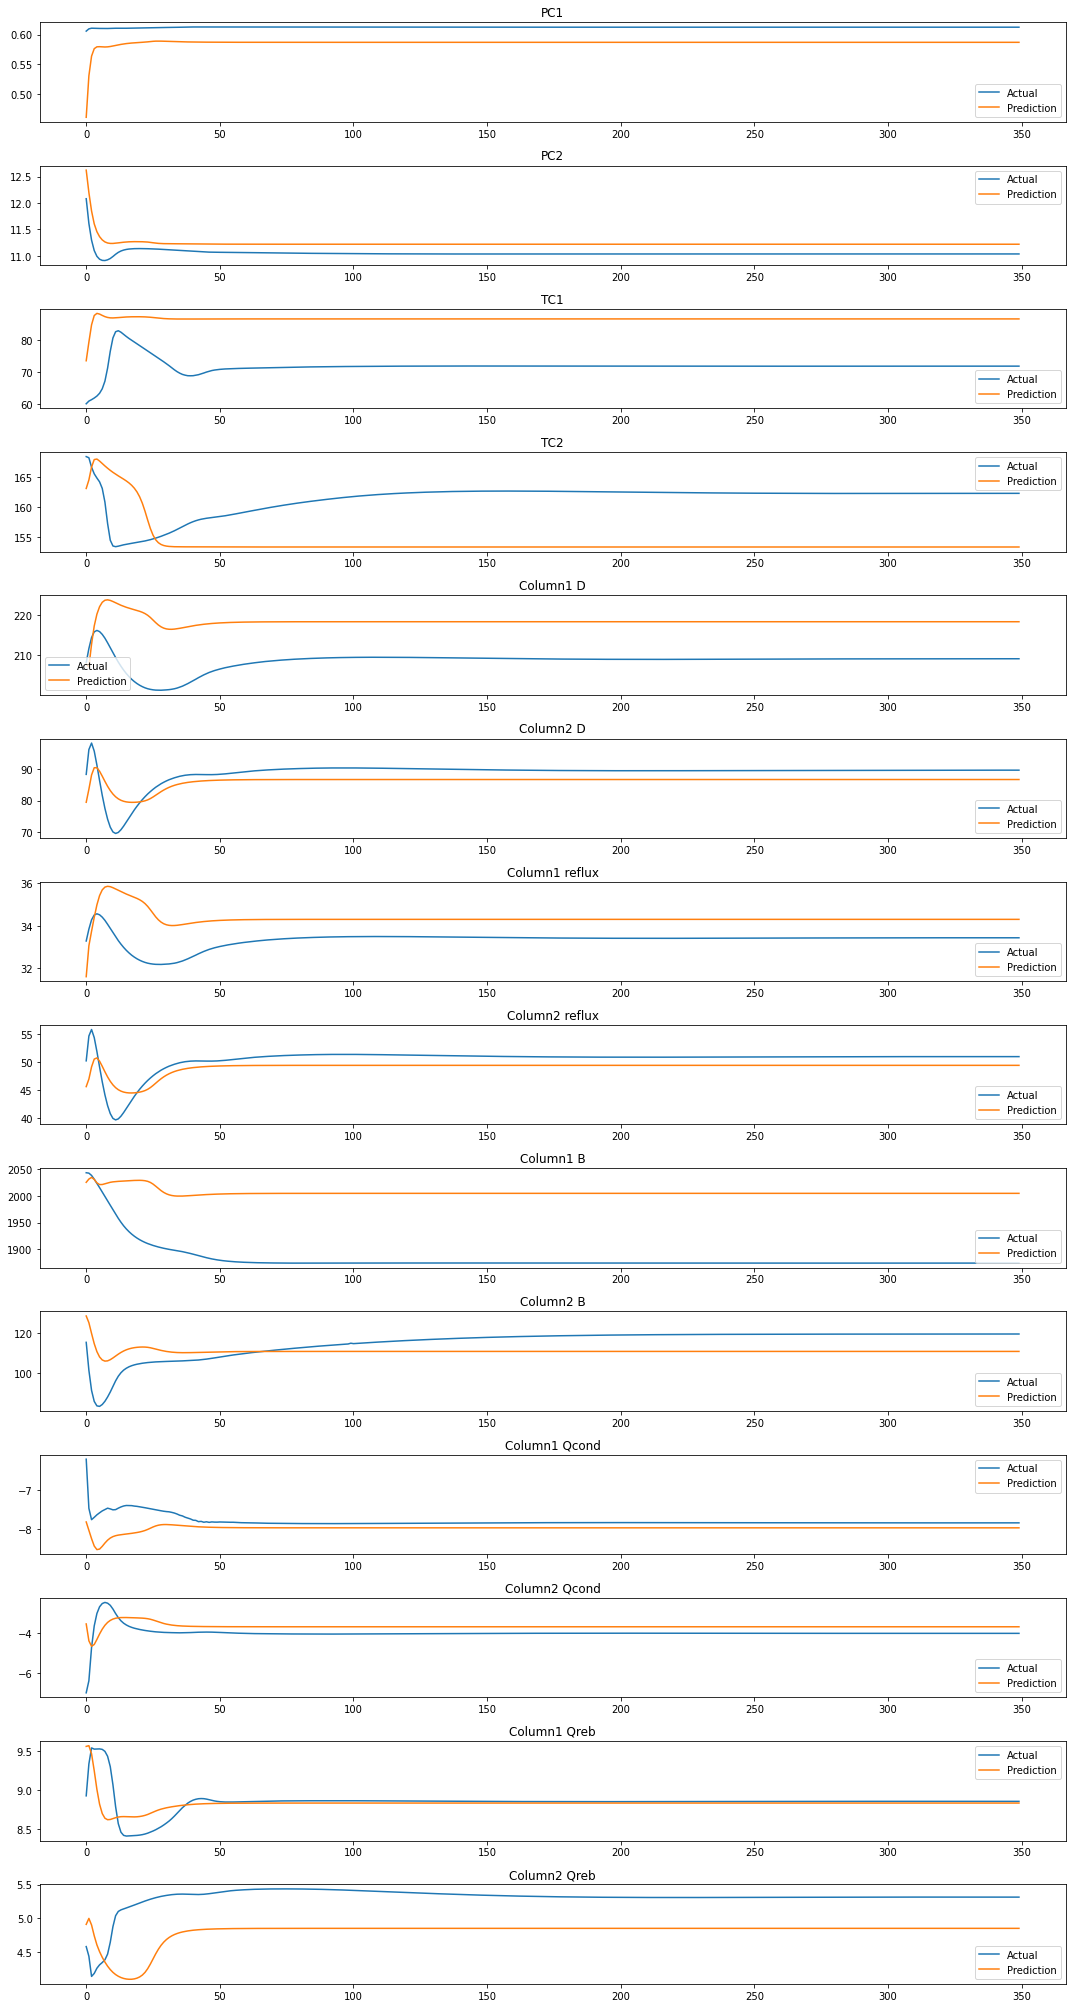

In [24]:
unit_size = 350

start_point = unit_size*1
test_input = df_test_sc[all_vars].iloc[start_point-history_size:start_point].values[np.newaxis]

# build encoder-decoder structure
encoder = Model(seq2seq_model.get_layer(name='encoder').input, seq2seq_model.get_layer(name='encoder').output)
encoder_out = encoder.predict(test_input)
encoder_states = encoder_out[1:]

decoder = Model(seq2seq_model.get_layer(name='decoder').input, seq2seq_model.get_layer(name='dense_last').output)
# input = [n sample, target len, dim vars], h=[n sample, dim context], c=[n sample, dim context]

# generate target sequence
decoder_out = []
decoder_in = test_input[:,[-1],:]
for i in range(unit_size):
    temp_out = decoder([decoder_in, encoder_states[0], encoder_states[1]])
    decoder_out.append(temp_out.numpy()[0,0,:])
    new_set = df_test_sc[set_points].iloc[[start_point+i]].values[np.newaxis]
    new_in = temp_out.numpy()
    decoder_in = np.concatenate([new_set, new_in], axis=2)

# prepare comparison
decoder_out_sc = np.array(decoder_out)
test_out_sc = df_test_sc[process_vars].iloc[start_point:start_point+unit_size].values

test_out = test_out_sc*std[process_vars].values + mean[process_vars].values
decoder_out = decoder_out_sc*std[process_vars].values + mean[process_vars].values

# plot graph
plt.figure(figsize=(15,2*len(process_vars)))
for i in range(len(process_vars)):
    plt.subplot(len(process_vars), 1, i+1)
    plt.plot(test_out[:,i], label='Actual')
    plt.plot(decoder_out[:,i], label='Prediction')
    plt.legend()
    plt.title(process_vars[i])
plt.tight_layout()
plt.show()

# Attention-based prediction 

In [43]:
def data2sequence(dataframe, 
                  set_points, process_vars,
                  history_size, prediction_size, 
                  step=1, start_idx=0, end_idx=None,
                  stride=1):
    
    history_inputs = set_points + process_vars
    target_outputs = process_vars
        
    history_data = dataframe[history_inputs].values
    target_data = dataframe[target_outputs].values
    
    encoder_input = []
    decoder_input = []
    decoder_output = []
    
    start_idx = start_idx + history_size # target step t+1
    
    if end_idx is None:
        end_idx = len(dataframe) - prediction_size
    else:
        end_idx = end_idx - prediction_size
    assert start_idx >= 0, 'start_idx is under 0'
    assert end_idx >=0, 'end_idx is under 0'
    
    i = start_idx
    while i <= end_idx:
        encoder_input.append(history_data[i-history_size : i : step])
        if prediction_size == 1:
            decoder_output.append(target_data[i])
        else:
            decoder_input.append(history_data[i-step : i-step+prediction_size : step])
            decoder_output.append(target_data[i : i+prediction_size : step])
            
        i+=stride
    
    encoder_input = np.array(encoder_input)
    decoder_input = np.array(decoder_input)
    decoder_output = np.array(decoder_output)
    
    return encoder_input, decoder_input, decoder_output

In [44]:
history_size = 40
prediction_size = 5
stride = 1

encoder_input, decoder_input, decoder_output = data2sequence(df_train_sc, 
                                                             set_points, process_vars,
                                                             history_size, prediction_size,
                                                             stride=stride)
print("Train dataset")
print("encoder_input:", encoder_input.shape)
print("decoder_input:", decoder_input.shape)
print("decoder_output:", decoder_output.shape)
print("")

Train dataset
encoder_input: (62956, 40, 22)
decoder_input: (62956, 5, 22)
decoder_output: (62956, 5, 14)



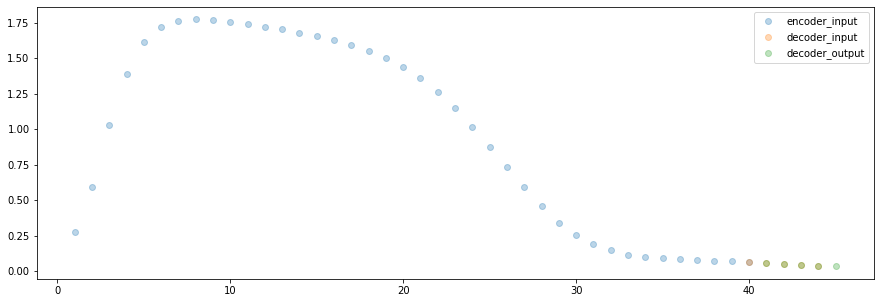

In [45]:
plt.figure(figsize=(15,5))
plt.scatter(range(1, 1+history_size), encoder_input[0, :, 11], label='encoder_input', alpha=0.3)
plt.scatter(range(history_size, history_size+prediction_size), decoder_input[0, :, 11], label='decoder_input', alpha=0.3)
plt.scatter(range(history_size+1, history_size+prediction_size+1), decoder_output[0, :, 3], label='decoder_output', alpha=0.3)
plt.legend()
plt.show()

## Seq2Seq model

> **squence-to-vector learning** <br>
> input sequence: (sample_size, history_size, # of input_vars) <br>
> output sequence: (sample_size, # of output_vars)

In [46]:
def super_attention(delta, prediction_size, prediction_dim, att_type):
    start_factor = 1 + delta
    end_factor = 1
    num_points = prediction_size    
    
    if att_type == 'linear':
        factor = np.linspace(start_factor, end_factor, num_points)
        factor = np.array([factor for i in range(prediction_dim)]).T
        factor = factor[np.newaxis,:,:]

    elif att_type == 'exp': 
        factor = np.array([(start_factor)**((num_points-k-1)/(num_points-1)) for k in range(num_points)])
        factor = np.array([factor for i in range(prediction_dim)]).T
        factor = factor[np.newaxis,:,:]

    else:
        print("invalid delta")
        
    return factor

def DATSeq2SeqLSTM(
    history_size, history_dim, 
    prediction_size, prediction_dim,
    encoder_neurons, decoder_neurons, dense_neurons,
    factor):
    
    encoder_input = Input(shape=(None, history_dim), name='input_encoder')
    
    # encoder module
    if len(encoder_neurons) == 1:
        encoder_output, state_h, state_c = LSTM(encoder_neurons[0], return_state=True, name='encoder')(encoder_input)
        encoder_states = [state_h, state_c]
        
    else:
        num_layers = len(encoder_neurons)
        for i, neurons in enumerate(encoder_neurons):
            #first encoder layer
            if i==0: 
                encoder_output = LSTM(neurons, return_sequences=True, name="encoder_1")(encoder_input)
            #mediate encoder layer
            elif i < num_layers-1: 
                encoder_output = LSTM(neurons, return_sequences=True, name=f"encoder_{i+1}")(encoder_output)
            #last encoder layer
            else: 
                encoder_output, state_h, state_c  = LSTM(neurons, return_state=True, name=f"encoder_last")(encoder_output)
                encoder_states = [state_h, state_c]
                
    # decoder input
    decoder_input = Input(shape=(None, history_dim), name='input_decoder')
    
    # decoder module
    if len(decoder_neurons) == 1:
        decoder_output = LSTM(decoder_neurons[0], return_sequences=True, name='decoder')(decoder_input, initial_state=encoder_states)
        
    else:
        num_layers = len(decoder_neurons)
        for i, neurons in enumerate(decoder_neurons):
            #first encoder layer
            if i==0: 
                decoder_output = LSTM(neurons, return_sequences=True, name='decoder_1')(decoder_input, initial_state=encoder_states)
            #mediate encoder layer
            elif i < num_layers-1: 
                decoder_output = LSTM(neurons, return_sequences=True, name=f"decoder_{i+1}")(decoder_output)
            #last encoder layer
            else: 
                decoder_output = LSTM(neurons, return_sequences=True, name=f"decoder_last")(decoder_output)
    
#     # temporal attention
#     attention = dot([decoder_output, encoder_output], axes=[2,2])
#     attention = Activation('softmax', name = 'alignment_score')(attention)
#     context = dot([attention, encoder_output],axes=[2,1])
#     combined_context = concatenate([context, decoder_output])  
    
    # dense module
    if len(dense_neurons) == 1:
        dense_output = Dense(dense_neurons[0], name='dense')(decoder_output)
        dense_output = Dense(prediction_dim, name='dense_last')(dense_output)
    else:
        num_layers = len(dense_neurons)
        for i, neurons in enumerate(dense_neurons):
            #first dense layer
            if i==0:
                dense_output = Dense(neurons, name='dense_1')(decoder_output)
            #mediate encoder layer
            else:
                dense_output = Dense(neurons, name=f'dense_{i+1}')(dense_output)
        dense_output = Dense(prediction_dim, name=f'dense_last')(dense_output)  
    
    # supervised attention
    multiply_output = Multiply(name='multiply')([dense_output, factor])
    
    # model compile
    model = Model([encoder_input, decoder_input], multiply_output)
    optimizer = keras.optimizers.Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss='mse', optimizer = optimizer)
    
    return model

bulid model

In [47]:
history_dim = len(set_points+process_vars)
prediction_dim = len(process_vars)
encoder_neurons = [100]
decoder_neurons = [100]
dense_neurons = [128, 64, 32]

delta = 2.5
att_type = 'exp'

factor = super_attention(delta, prediction_size, prediction_dim, att_type)

DATseq2seq_model = DATSeq2SeqLSTM(history_size, history_dim,
                               prediction_size, prediction_dim,
                               encoder_neurons, decoder_neurons, dense_neurons,
                               factor)

DATseq2seq_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_encoder (InputLayer)     [(None, None, 22)]   0           []                               
                                                                                                  
 input_decoder (InputLayer)     [(None, None, 22)]   0           []                               
                                                                                                  
 encoder (LSTM)                 [(None, 100),        49200       ['input_encoder[0][0]']          
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                            

In [48]:
decoder_output_wt = decoder_output*factor

In [49]:
decoder_input.shape

(62956, 5, 22)

In [50]:
decoder_output_wt.shape

(62956, 5, 14)

model training

In [51]:
import os

def exists(path):
    istrue = os.path.exists(path)
    return istrue

def createfolder(path):
    if not exists(path):
        os.makedirs(path)

In [52]:
from keras.callbacks import EarlyStopping

patience = 20
monitor='val_loss'
early_stopping_cb = EarlyStopping(patience=patience, restore_best_weights= True, monitor=monitor)

epochs = 10000
verbose = 2
batch_size = 128
valid_ratio = 0.2

# data_setting = f'R{random_state},N{data_size},S_t{test_ratio}_v{valid_ratio}'
# sequence_setting = f'W_h{history_size}_p{prediction_size}_s{stride}'
# model_setting = 
model_name = f'DATseq2seq_model {history_size} history {prediction_size} prediction version 1'
save_path = f'./model/{model_name}'
if not exists(save_path):
    tf.random.set_seed(random_state)
    history = DATseq2seq_model.fit([encoder_input, decoder_input], decoder_output_wt,
                                epochs=epochs, batch_size = batch_size,
                                callbacks=[early_stopping_cb], verbose=verbose,
                                validation_split=valid_ratio)
    tf.keras.models.save_model(DATseq2seq_model, save_path)
    print(f"model is saved to: {save_path}")
    
else:
    DATseq2seq_model = tf.keras.models.load_model(save_path)
    print(f"model is loaded from: {save_path}")

Epoch 1/10000
394/394 - 9s - loss: 0.1788 - val_loss: 0.0621 - 9s/epoch - 24ms/step
Epoch 2/10000
394/394 - 5s - loss: 0.0398 - val_loss: 0.0465 - 5s/epoch - 13ms/step
Epoch 3/10000
394/394 - 5s - loss: 0.0341 - val_loss: 0.0408 - 5s/epoch - 13ms/step
Epoch 4/10000
394/394 - 5s - loss: 0.0323 - val_loss: 0.0377 - 5s/epoch - 13ms/step
Epoch 5/10000
394/394 - 5s - loss: 0.0309 - val_loss: 0.0356 - 5s/epoch - 13ms/step
Epoch 6/10000
394/394 - 5s - loss: 0.0303 - val_loss: 0.0378 - 5s/epoch - 13ms/step
Epoch 7/10000
394/394 - 5s - loss: 0.0299 - val_loss: 0.0350 - 5s/epoch - 12ms/step
Epoch 8/10000
394/394 - 5s - loss: 0.0297 - val_loss: 0.0351 - 5s/epoch - 13ms/step
Epoch 9/10000
394/394 - 5s - loss: 0.0293 - val_loss: 0.0360 - 5s/epoch - 13ms/step
Epoch 10/10000
394/394 - 5s - loss: 0.0292 - val_loss: 0.0354 - 5s/epoch - 13ms/step
Epoch 11/10000
394/394 - 5s - loss: 0.0289 - val_loss: 0.0331 - 5s/epoch - 13ms/step
Epoch 12/10000
394/394 - 5s - loss: 0.0289 - val_loss: 0.0337 - 5s/epoch -

INFO:tensorflow:Assets written to: ./model/DATseq2seq_model 40 history 5 prediction version 1\assets


INFO:tensorflow:Assets written to: ./model/DATseq2seq_model 40 history 5 prediction version 1\assets


model is saved to: ./model/DATseq2seq_model 40 history 5 prediction version 1


model test

1/1 [==============================] - 0s 295ms/step


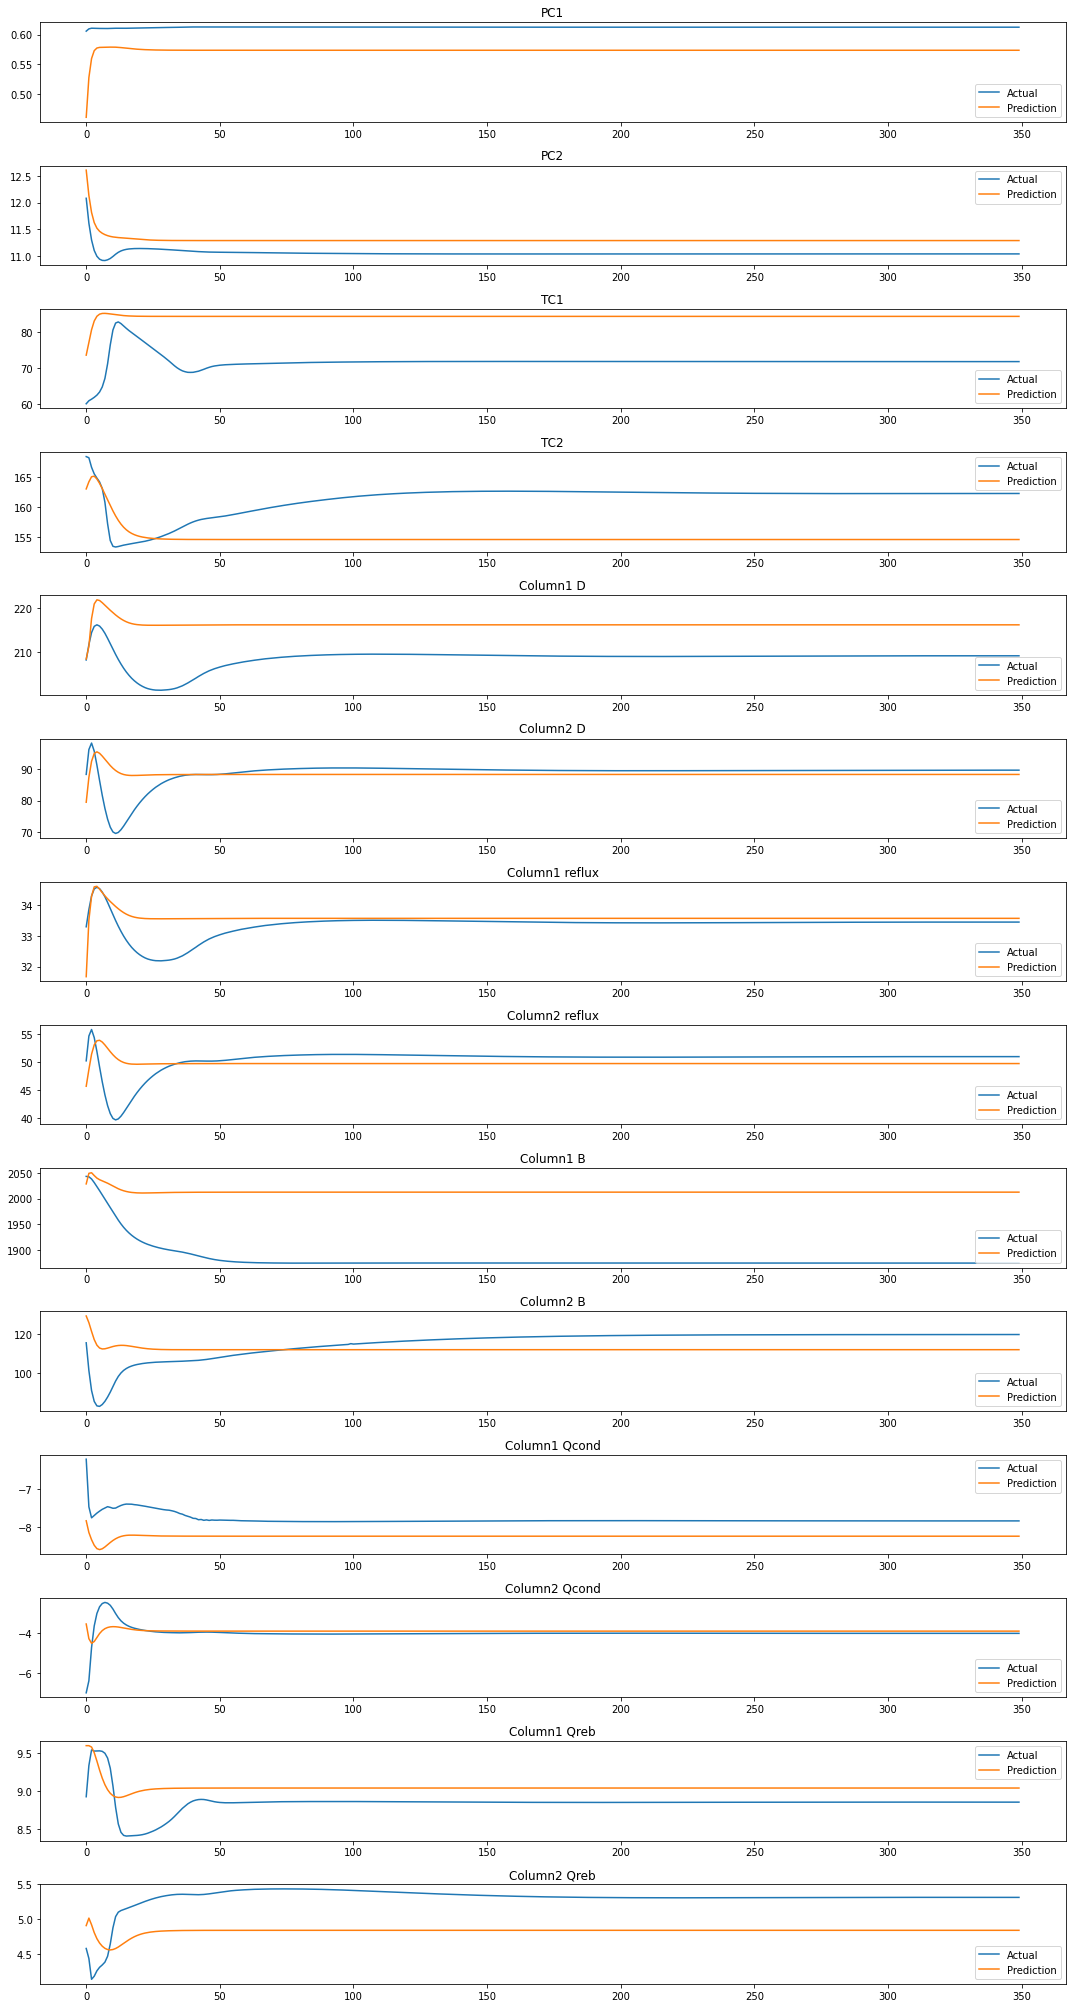

In [53]:
unit_size = 350

start_point = unit_size*1
test_input = df_test_sc[all_vars].iloc[start_point-history_size:start_point].values[np.newaxis]

# build encoder-decoder structure
encoder = Model(DATseq2seq_model.get_layer(name='encoder').input, DATseq2seq_model.get_layer(name='encoder').output)
encoder_out = encoder.predict(test_input)
encoder_states = encoder_out[1:]

decoder = Model(DATseq2seq_model.get_layer(name='decoder').input, DATseq2seq_model.get_layer(name='dense_last').output)
# input = [n sample, target len, dim vars], h=[n sample, dim context], c=[n sample, dim context]

# generate target sequence
decoder_out = []
decoder_in = test_input[:,[-1],:]
for i in range(unit_size):
    temp_out = decoder([decoder_in, encoder_states[0], encoder_states[1]])
    decoder_out.append(temp_out.numpy()[0,0,:])
    new_set = df_test_sc[set_points].iloc[[start_point+i]].values[np.newaxis]
    new_in = temp_out.numpy()
    decoder_in = np.concatenate([new_set, new_in], axis=2)

# prepare comparison
decoder_out_sc = np.array(decoder_out)
test_out_sc = df_test_sc[process_vars].iloc[start_point:start_point+unit_size].values

test_out = test_out_sc*std[process_vars].values + mean[process_vars].values
decoder_out = decoder_out_sc*std[process_vars].values + mean[process_vars].values

# plot graph
plt.figure(figsize=(15,2*len(process_vars)))
for i in range(len(process_vars)):
    plt.subplot(len(process_vars), 1, i+1)
    plt.plot(test_out[:,i], label='Actual')
    plt.plot(decoder_out[:,i], label='Prediction')
    plt.legend()
    plt.title(process_vars[i])
plt.tight_layout()
plt.show()